In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
path = "data-sets/swiss_bank_notes.csv"
df = pd.read_csv(path)

In [3]:
df

,type,length,left,right,bottom,top,diag
0,real,214.8,131.0,131.1,9.0,9.7,141.0
1,real,214.6,129.7,129.7,8.1,9.5,141.7
2,real,214.8,129.7,129.7,8.7,9.6,142.2
3,real,214.8,129.7,129.6,7.5,10.4,142.0
4,real,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,fake,215.0,130.4,130.3,9.9,12.1,139.6
196,fake,215.1,130.3,129.9,10.3,11.5,139.7
197,fake,214.8,130.3,130.4,10.6,11.1,140.0
198,fake,214.7,130.7,130.8,11.2,11.2,139.4


In [4]:
df['type'] = df['type'].map({'fake': 0, 'real': 1})

Reproducing the results from chapter 3 of Hardie

In [46]:
X_fake = df[df["type"] == 0]
X_fake = X_fake.drop(columns=["type"])

X_genuine = df[df["type"] == 1]
X_genuine = X_genuine.drop(columns=["type"])


X = df.drop(columns=["type"])
y = df['type']

In [43]:
S = np.cov(X, rowvar=False)
S.round(2)

array([[ 0.14,  0.03,  0.02, -0.1 , -0.02,  0.08],
       [ 0.03,  0.13,  0.11,  0.22,  0.11, -0.21],
       [ 0.02,  0.11,  0.16,  0.28,  0.13, -0.24],
       [-0.1 ,  0.22,  0.28,  2.09,  0.16, -1.04],
       [-0.02,  0.11,  0.13,  0.16,  0.64, -0.55],
       [ 0.08, -0.21, -0.24, -1.04, -0.55,  1.33]])

In [51]:
S_f = np.cov(X_fake, rowvar=False)
S_f.round(3)

array([[ 0.124,  0.032,  0.024, -0.101,  0.019,  0.012],
       [ 0.032,  0.065,  0.047, -0.024, -0.012, -0.005],
       [ 0.024,  0.047,  0.089, -0.019,  0.   ,  0.034],
       [-0.101, -0.024, -0.019,  1.281, -0.49 ,  0.238],
       [ 0.019, -0.012,  0.   , -0.49 ,  0.404, -0.022],
       [ 0.012, -0.005,  0.034,  0.238, -0.022,  0.311]])

In [52]:
S_g = np.cov(X_genuine, rowvar=False)
S_g.round(3)

array([[ 0.15 ,  0.058,  0.057,  0.057,  0.014,  0.005],
       [ 0.058,  0.133,  0.086,  0.057,  0.049, -0.043],
       [ 0.057,  0.086,  0.126,  0.058,  0.031, -0.024],
       [ 0.057,  0.057,  0.058,  0.413, -0.263, -0.   ],
       [ 0.014,  0.049,  0.031, -0.263,  0.421, -0.075],
       [ 0.005, -0.043, -0.024, -0.   , -0.075,  0.2  ]])

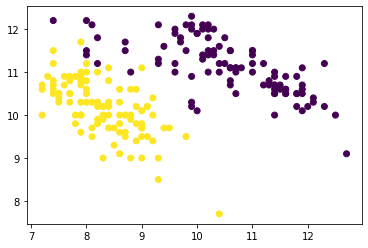

In [59]:
plt.scatter(df['bottom'], df['top'], c=df['type'])

In [71]:
S_g = S_g.round(3)

std_dev = np.sqrt(np.diag(S_g))
std_dev = np.outer(std_dev, std_dev)

R = S_g / std_dev
R = R.round(3)

In [72]:
R

array([[ 1.   ,  0.411,  0.415,  0.229,  0.056,  0.029],
       [ 0.411,  1.   ,  0.664,  0.243,  0.207, -0.264],
       [ 0.415,  0.664,  1.   ,  0.254,  0.135, -0.151],
       [ 0.229,  0.243,  0.254,  1.   , -0.631, -0.   ],
       [ 0.056,  0.207,  0.135, -0.631,  1.   , -0.258],
       [ 0.029, -0.264, -0.151, -0.   , -0.258,  1.   ]])

Performing the regression fit on the genuine notes

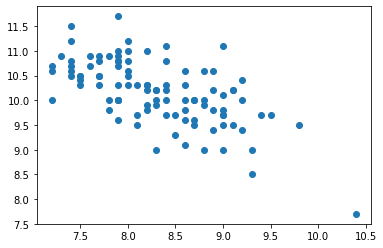

In [76]:
plt.scatter(X_genuine["bottom"], X_genuine["top"])

In [93]:
X = X_genuine[["top"]]             # Double brackets makes it a DataFrame (2D)
y = X_genuine["bottom"] 

lm = LinearRegression().fit(X, y)

In [94]:
print(f"slope: {lm.coef_[0]}")
print(f"intercept {lm.intercept_}")

slope: -0.6255515904992136
intercept 14.665608572196003


### PCA 

See lecture 3 - PCA Part I. 

In [23]:
y = df['type']
X = df.drop(columns=["type"])
X_center = X - X.mean()

In [24]:
X_center

,length,left,right,bottom,top,diag
0,-0.096,0.8785,1.1435,-0.4175,-0.9505,0.5165
1,-0.296,-0.4215,-0.2565,-1.3175,-1.1505,1.2165
2,-0.096,-0.4215,-0.2565,-0.7175,-1.0505,1.7165
3,-0.096,-0.4215,-0.3565,-1.9175,-0.2505,1.5165
4,0.104,-0.5215,-0.2565,0.9825,-2.9505,1.3165
...,...,...,...,...,...,...
195,0.104,0.2785,0.3435,0.4825,1.4495,-0.8835
196,0.204,0.1785,-0.0565,0.8825,0.8495,-0.7835
197,-0.096,0.1785,0.4435,1.1825,0.4495,-0.4835
198,-0.196,0.5785,0.8435,1.7825,0.5495,-1.0835


In [29]:
pca = PCA()
pca.fit(X)

PCA()

In [26]:
np.round(pca.components_.T, 3)

array([[-0.044, -0.011,  0.326,  0.562, -0.753, -0.098],
       [ 0.112, -0.071,  0.259,  0.455,  0.347,  0.767],
       [ 0.139, -0.066,  0.345,  0.415,  0.535, -0.632],
       [ 0.768,  0.563,  0.218, -0.186, -0.1  ,  0.022],
       [ 0.202, -0.659,  0.557, -0.451, -0.102,  0.035],
       [-0.579,  0.489,  0.592, -0.258,  0.084,  0.046]])

In [ ]:
pca.